## Observations and Insights 
* First, Capomulin and Ramicane are the top two treatments in this study. They have the lowest averages in tumor volume over the coarse of the 45 days. This is clearly visible in the box plot figure.
* Second, the mice that were on the Capomulin treatment demonstrated that their tumors would shrink over the coarse of the 45 days. Capomulin is the best treatment that was used during this trial period. This is shown once we calculate the interquartiles, median, outliers, and upper and lower bounds of this treatment along with the other top treatments. Although, Ramicane does come really close to the best treatment.
* Third, the correlation coefficient shows us there is an interdependence between the average tumor volume and the weight of the mice. As tumors grow, the weight of the mice increases; if the tumor shrinks their weight decreases.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = 'data/Mouse_metadata.csv'
study_results_path = 'data/Study_results.csv'

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, how="left", on=['Mouse ID', 'Mouse ID'])

# Display the data table for preview
combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
num_of_mice = combined_df['Mouse ID'].count()
num_of_mice

1893

In [3]:
unique_mice = combined_df['Mouse ID'].nunique()
unique_mice

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_info = combined_df[combined_df.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_info

#Therefore, the duplicate mouse found by 'Mouse ID' AND 'Timepoint' is "g989".

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df[combined_df['Mouse ID'] != 'g989']
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
num_of_mice = clean_df['Mouse ID'].count()
num_of_mice

1880

In [7]:
unique_mice = clean_df['Mouse ID'].nunique()
unique_mice

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor 
# volume for each regimen.
# This method is the most straighforward, creating multiple series and putting them all together at the end.
for_stats = clean_df.groupby('Drug Regimen')
mean = for_stats['Tumor Volume (mm3)'].mean()
median = for_stats['Tumor Volume (mm3)'].median()
variance = for_stats['Tumor Volume (mm3)'].var()
st_dev = for_stats['Tumor Volume (mm3)'].std()
SEM = for_stats['Tumor Volume (mm3)'].sem()

summary_stats = pd.DataFrame({
    "Mean": round(mean,3),
    "Median": round(median,3),
    "Variance": round(variance,3),
    "Std Dev": round(st_dev,3),
    "SEM": round(SEM,3)
})
summary_stats

,Mean,Median,Variance,Std Dev,SEM
Drug Regimen,,,,,
Capomulin,40.676,41.558,24.948,4.995,0.329
Ceftamin,52.591,51.776,39.290,6.268,0.470
Infubinol,52.885,51.821,43.129,6.567,0.492
Ketapril,55.236,53.699,68.554,8.280,0.604
Naftisol,54.332,52.509,66.173,8.135,0.596
Placebo,54.034,52.289,61.168,7.821,0.581
Propriva,52.321,50.446,43.852,6.622,0.544
Ramicane,40.217,40.673,23.487,4.846,0.321
Stelasyn,54.233,52.432,59.451,7.710,0.573


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor 
#volume for each regimen
# This method produces everything in a single groupby function.
summary_stats2 = clean_df.groupby('Drug Regimen').aggregate({
    'Tumor Volume (mm3)': ["mean", "median", "var", "std", "sem"]
}).rename(columns= {"mean": "Mean", "median": "Median", "var": "Variance", "std": "Std Dev", "sem": "SEM"})
summary_stats2

Tumor Volume (mm3)                                          
                           Mean     Median   Variance   Std Dev       SEM
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

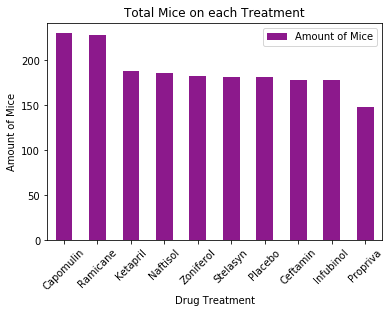

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas.

# I used pyplot method first and then pandas; I used the arrays to manually add the x,y values for the pandas method:
Data = {'Drug Treatment': ["Capomulin", "Ramicane", "Ketapril", "Naftisol", "Zoniferol", 
                       "Stelasyn", "Placebo", "Ceftamin", "Infubinol", "Propriva"], 
        'Amount of Mice': [230, 228, 188, 186, 182, 181, 181, 178, 178, 148]
       }
df = DataFrame(Data, columns=['Drug Treatment','Amount of Mice'])
df.plot(x='Drug Treatment', y='Amount of Mice', kind="bar", color='purple', alpha=0.9, rot=45)
plt.title("Total Mice on each Treatment")
plt.xlabel("Drug Treatment")
plt.ylabel("Amount of Mice")
plt.show()

In [11]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot. 
x = clean_df['Drug Regimen'].unique()
x

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

In [12]:
y = clean_df['Drug Regimen'].value_counts()
y

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Ceftamin     178
Infubinol    178
Propriva     148
Name: Drug Regimen, dtype: int64

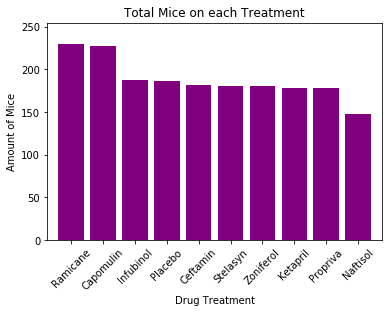

In [13]:
plt.bar(x, y, color='purple', alpha=1, align="center")
plt.xlim(-0.75, len(x)-0.25)
plt.ylim(0, max(y)+25)
plt.title("Total Mice on each Treatment")
plt.xlabel("Drug Treatment")
plt.ylabel("Amount of Mice")
tick_locations = [value for value in x]
plt.xticks(tick_locations, rotation=45)
plt.show()

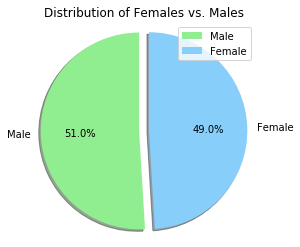

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pandas.
gender_dist_df = pd.DataFrame({' ': [958, 922]}, 
                           index = ['Male', 'Female'])
colors = ['lightgreen', 'lightskyblue']
explode = (0, 0.1)        
plot = gender_dist_df.plot(kind="pie", y=' ', figsize=(4,4), explode=explode, 
                               colors=colors, autopct="%1.1f%%", shadow=True, startangle=90)
plt.title("Distribution of Females vs. Males")
plt.axis("equal")
plt.show()

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot.
genders = clean_df['Sex'].unique()
genders

array(['Male', 'Female'], dtype=object)

In [16]:
female_v_male = clean_df['Sex'].value_counts()
female_v_male

Male      958
Female    922
Name: Sex, dtype: int64

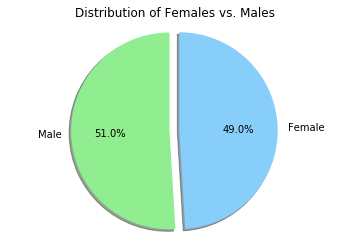

In [17]:
explode = (0, 0.1)
colors = ['lightgreen', 'lightskyblue']
plt.pie(female_v_male, explode=explode, labels=genders, colors=colors, autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")
plt.title("Distribution of Females vs. Males")
plt.show()

## Quartiles, Outliers and Boxplots

In [18]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_per_mouse_df = clean_df.groupby(['Mouse ID'])['Timepoint'].max()
unique_drug_df = clean_df.groupby(['Mouse ID'])['Drug Regimen'].last()
last_tumor_vol_df = clean_df.groupby(['Mouse ID'])['Tumor Volume (mm3)'].last()
final_wt_df = clean_df.groupby(['Mouse ID'])['Weight (g)'].last()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge_one_df = pd.merge(last_per_mouse_df, unique_drug_df, how="left", on=['Mouse ID'])
final_df = pd.merge(merge_one_df, last_tumor_vol_df, how="left", on=['Mouse ID']).rename(columns=
                                                                                         {"Timepoint": "Last Timepoint"})
# I needed to add weight in the dataframe so I can perform the analysis on the scatter plot:
modified_df = pd.merge(final_df, final_wt_df, how="left", on=['Mouse ID'])
modified_df

,Last Timepoint,Drug Regimen,Tumor Volume (mm3),Weight (g)
Mouse ID,,,,
a203,45,Infubinol,67.973419,23
a251,45,Infubinol,65.525743,25
a262,45,Placebo,70.717621,29
a275,45,Ceftamin,62.999356,28
a366,30,Stelasyn,63.440686,29
...,...,...,...,...
z435,10,Propriva,48.710661,26
z578,45,Ramicane,30.638696,16
z581,45,Infubinol,62.754451,25


-------------------------------------------------------------------
The lower quartile of the Capomulin treatment is: 32.37735684
The upper quartile of the Capomulin treatment is: 40.1592203
The interquartile range of the Capomulin treatment is: 7.781863460000004
The the median of the Capomulin treatment is: 38.125164399999996 
Any values below 20.70456164999999 could be outliers.
Any values above 51.83201549 could be outliers.
-------------------------------------------------------------------
The lower quartile of the Ramicane treatment is: 31.56046955
The upper quartile of the Ramicane treatment is: 40.65900627
The interquartile range of the Ramicane treatment is: 9.098536719999998
The the median of the Ramicane treatment is: 36.56165229 
Any values below 17.912664470000003 could be outliers.
Any values above 54.30681135 could be outliers.
-------------------------------------------------------------------
The lower quartile of the Infubinol treatment is: 54.04860769
The upper quart

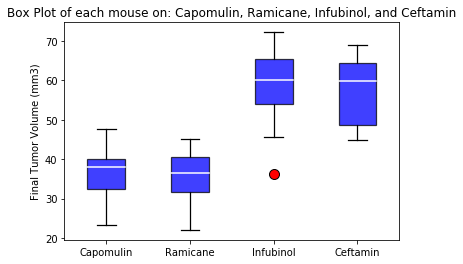

In [19]:
# Put treatments into a list for 'for loop'
treatment_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting later...)
tumor_vol_by_treatment = []

for treatment in treatment_list:
    tumor_vol_by_treatment.append(modified_df[modified_df['Drug Regimen'] == treatment]['Tumor Volume (mm3)'])


# Calculate the IQR and quantitatively determine if there are any potential outliers.
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset
    # Determine outliers using upper and lower bounds

# Creating separate variables for the top four drug treatments so I can run the calculations:
for_cap = modified_df[modified_df['Drug Regimen'] == 'Capomulin']['Tumor Volume (mm3)']
for_ram = modified_df[modified_df['Drug Regimen'] == 'Ramicane']['Tumor Volume (mm3)']
for_inf = modified_df[modified_df['Drug Regimen'] == 'Infubinol']['Tumor Volume (mm3)']
for_cef = modified_df[modified_df['Drug Regimen'] == 'Ceftamin']['Tumor Volume (mm3)']

# IQR/Outliers and Upper and Lower Bounds:
# For the Capomulin treatement:
quartiles = for_cap.quantile([0.25, 0.5, 0.75])
lower_quartile = quartiles[0.25]
upper_quartile = quartiles[0.75]
IQR = (upper_quartile - lower_quartile)
print("-------------------------------------------------------------------")
print(f"The lower quartile of the Capomulin treatment is: {lower_quartile}")
print(f"The upper quartile of the Capomulin treatment is: {upper_quartile}")
print(f"The interquartile range of the Capomulin treatment is: {IQR}")
print(f"The the median of the Capomulin treatment is: {quartiles[0.5]} ")
lower_bound = (lower_quartile - (1.5 * IQR))
upper_bound = (upper_quartile + (1.5 * IQR))
print(f"Any values below {lower_bound} could be outliers.")
print(f"Any values above {upper_bound} could be outliers.")
print("-------------------------------------------------------------------")

# For the Ramicane treatement:
quartiles = for_ram.quantile([0.25, 0.5, 0.75])
lower_quartile = quartiles[0.25]
upper_quartile = quartiles[0.75]
IQR = (upper_quartile - lower_quartile)
print(f"The lower quartile of the Ramicane treatment is: {lower_quartile}")
print(f"The upper quartile of the Ramicane treatment is: {upper_quartile}")
print(f"The interquartile range of the Ramicane treatment is: {IQR}")
print(f"The the median of the Ramicane treatment is: {quartiles[0.5]} ")
lower_bound = (lower_quartile - (1.5 * IQR))
upper_bound = (upper_quartile + (1.5 * IQR))
print(f"Any values below {lower_bound} could be outliers.")
print(f"Any values above {upper_bound} could be outliers.")
print("-------------------------------------------------------------------")

# For the Infubinol treatement:
quartiles = for_inf.quantile([0.25, 0.5, 0.75])
lower_quartile = quartiles[0.25]
upper_quartile = quartiles[0.75]
IQR = (upper_quartile - lower_quartile)
print(f"The lower quartile of the Infubinol treatment is: {lower_quartile}")
print(f"The upper quartile of the Infubinol treatment is: {upper_quartile}")
print(f"The interquartile range of the Infubinol treatment is: {IQR}")
print(f"The the median of the Infubinol treatment is: {quartiles[0.5]} ")
lower_bound = (lower_quartile - (1.5 * IQR))
upper_bound = (upper_quartile + (1.5 * IQR))
print(f"Any values below {lower_bound} could be outliers.")
print(f"Any values above {upper_bound} could be outliers.")
print("-------------------------------------------------------------------")

# For the Ceftamin treatement:
quartiles = for_cef.quantile([0.25, 0.5, 0.75])
lower_quartile = quartiles[0.25]
upper_quartile = quartiles[0.75]
IQR = (upper_quartile - lower_quartile)
print(f"The lower quartile of the Ceftamin treatment is: {lower_quartile}")
print(f"The upper quartile of the Ceftamin treatment is: {upper_quartile}")
print(f"The interquartile range of the Ceftamin treatment is: {IQR}")
print(f"The the median of the Ceftamin treatment is: {quartiles[0.5]}")
lower_bound = (lower_quartile - (1.5 * IQR))
upper_bound = (upper_quartile + (1.5 * IQR))
print(f"Any values below {lower_bound} could be outliers.")
print(f"Any values above {upper_bound} could be outliers.")
print("-------------------------------------------------------------------")


# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Box Plot of each mouse on: Capomulin, Ramicane, Infubinol, and Ceftamin')
ax1.set_xticklabels(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
ax1.set_ylabel('Final Tumor Volume (mm3)')
bp = ax1.boxplot(tumor_vol_by_treatment, patch_artist=True)

# Changing the colors on the box plots, for fun:
for box in bp['boxes']:
    box.set(color='black')
    box.set(facecolor = 'b', alpha=0.75, linewidth=1.25)
for whisker in bp['whiskers']:
    whisker.set(color='black', linewidth=1.25)
for cap in bp['caps']:
    cap.set(color='black', linewidth=1.25)
for median in bp['medians']:
    median.set(color='w', linewidth=1.5)
for flier in bp['fliers']:
    flier.set(marker='o', markerfacecolor='r', markersize=10)
plt.show()

## Line and Scatter Plots

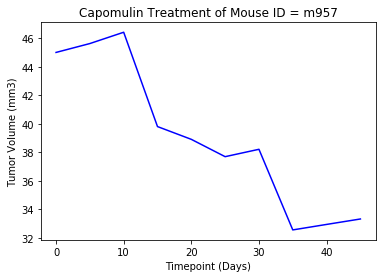

In [20]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

# Just to search for a random Mouse ID that was treated with Capomulin:
mice_w_capo = modified_df[modified_df['Drug Regimen'] == 'Capomulin']

# I chose 'Mouse ID' 'm957' for my line plot:
m957_df = clean_df[clean_df['Mouse ID'] == 'm957']

x_values = m957_df['Timepoint']
y_values = m957_df['Tumor Volume (mm3)']
plt.plot(x_values, y_values, color='b')
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin Treatment of Mouse ID = m957')
plt.show()

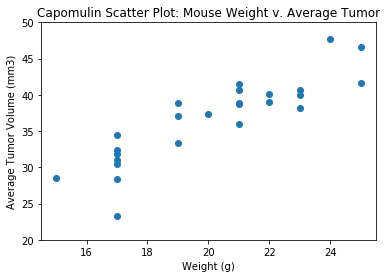

In [21]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

# Finding all of the mice that took Capomulin during this study:
Capomulin_mice = modified_df[modified_df['Drug Regimen'] == 'Capomulin']
Capomulin_mice

mice_wt = Capomulin_mice['Weight (g)']
mice_wt
avg_tumor_vol = Capomulin_mice['Tumor Volume (mm3)']
avg_tumor_vol
plt.xlim(14.5,25.5)
plt.ylim(20,50)
plt.scatter(mice_wt, avg_tumor_vol, marker="o")
plt.title("Capomulin Scatter Plot: Mouse Weight v. Average Tumor")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between the weight of the mice and the average tumor volume is 0.88.


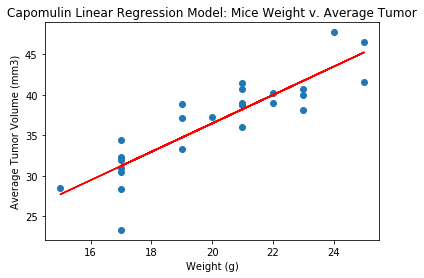

In [22]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation = st.pearsonr(mice_wt, avg_tumor_vol)
correlation
print(f"The correlation between the weight of the mice and the average tumor volume is {round(correlation[0],2)}.")

mice_wt = Capomulin_mice['Weight (g)']
avg_tumor_vol = Capomulin_mice['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(mice_wt, avg_tumor_vol)
regress_values = mice_wt * slope + intercept
line_eqn = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(mice_wt, avg_tumor_vol)
plt.plot(mice_wt, regress_values, "r-")
# plt.annotate(line_eqn,(20,30), fontsize=12.5, color="r")
plt.title("Capomulin Linear Regression Model: Mice Weight v. Average Tumor")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()